In [1]:
#importing important libraries
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
##initialzing the initial conditions
theta_initial=np.pi/3
theta_d_initial=0

In [3]:
##next up, we gonna draw the pendulum
def draw_pendulum(theta,width=200,height=200,m=1,l=1):
    image = Image.new("RGB", (width, height), "yellow")
    #convert the length of the pendulum to some image units
    L=int(0.4*height*l)
    d=int(0.02*height)*m**(1/3) # diameter
    #how we gonna draw the images
    draw = ImageDraw.Draw(image)
    x0=int(width/2) ##calculating the rectagular coodinates
    y0=int(height/2)
    x=x0+L*np.sin(theta)
    y=y0+L*np.cos(theta)
    #draw the pendulum
    draw.line([(x0,y0),(x,y)],fill=(0,0,0),width=1)
    draw.ellipse([(x-d,y-d),(x+d,y+d)], fill=(0,0,255), outline=None)
    return image

In [5]:
##example of a pendulum draw
image=draw_pendulum(theta_initial)
image.show()

In [6]:
def energy_calculation(theta,theta_d,m=1,l=1,g=10):
    #the height of the mass
    y=l*np.cos(theta)
    #potential energy
    e_pot=-m*g*y
    #kinetic energy
    e_kin=m/2*(l*theta_d)**2
    return e_pot,e_kin

In [7]:
##testing the above function
e_pot,e_kin=energy_calculation(theta_initial,theta_d_initial)
print('potential energy: '+str(e_pot)[:5])
print('kinetic energy: '+str(e_kin)[:5])

potential energy: -5.00
kinetic energy: 0.0


In [8]:

def trajectory(theta_initial,theta_d_initial,n_iter=1000,dt=0.01,g=10,l=1):
    phase_trajectory=np.zeros((n_iter,2))
    phase_trajectory[0,:]=np.array([theta_initial,theta_d_initial])

    for i in range(n_iter-1):
        theta_dd=-g/l*np.sin(phase_trajectory[i,0])
        phase_trajectory[i+1,1]=phase_trajectory[i,1]+dt*theta_dd
        phase_trajectory[i+1,0]=phase_trajectory[i,0]+dt*phase_trajectory[i,1]
    return phase_trajectory

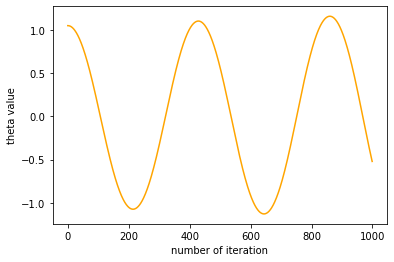

In [11]:
##testing the above function
dt=0.005
n_iter=1000
phase_trajectory=trajectory(theta_initial,theta_d_initial,dt=dt,n_iter=n_iter)
plt.plot(phase_trajectory[:,0],color='orange')
plt.ylabel('theta value')
plt.xlabel('number of iteration')
plt.show()

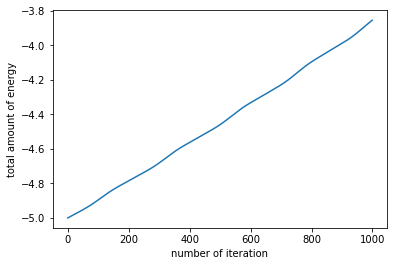

In [13]:
##calculating the energy of the trajectory
total__amt_energy=[]
for i in range(phase_trajectory.shape[0]):
    e_pot,e_kin=energy_calculation(phase_trajectory[i,0],phase_trajectory[i,1])
    total__amt_energy.append(e_pot+e_kin)	
plt.plot(total__amt_energy)
plt.ylabel('total amount of energy')
plt.xlabel('number of iteration')
plt.show()

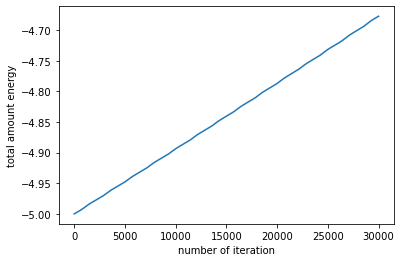

In [14]:

#increasing the number of steps by a certain factor lets say 10
dt=0.0005
n_iter=30000
#and now let's repeat the energy experiment
phase_trajectory=trajectory(theta_initial,theta_d_initial,dt=dt,n_iter=n_iter)
total__amt_energy=[]
for i in range(phase_trajectory.shape[0]):
	e_pot,e_kin=energy_calculation(phase_trajectory[i,0],phase_trajectory[i,1])
	total__amt_energy.append(e_pot+e_kin)	
plt.plot(total__amt_energy)
plt.ylabel('total amount energy')
plt.xlabel('number of iteration')
plt.show()

In [15]:
##rendering the trajectory
frames_per_sec=20
take_frame_every=int(1/(dt*frames_per_sec))

In [16]:
def pil_list_to_cv2(pil_list):
    #converts a list of pil images to a list of cv2 images
    png_list=[]
    for pil_img in pil_list:
        pil_img.save('trash_image.png',format='png')
        png_list.append(cv2.imread('trash_image.png'))
    os.remove('trash_image.png')
    return png_list

def generating_video(cv2_list,path='car_race.avi',fps=10): 
    if len(cv2_list)==0:
        raise ValueError('the given png list is empty!')
    video_name = path
    frame=cv2_list[0]  
    height, width, layers = frame.shape   
    video = cv2.VideoWriter(video_name, 0, fps, (width, height)) 
    for cv2_image in cv2_list:  
        video.write(cv2_image) 
    cv2.destroyAllWindows()  
    video.release()  # releasing the video generated

In [23]:
##writing the rendering function
import cv2
import os
def rendering_trajectory_func(phase_trajectory,m=1,l=1,g=10,save_path='',take_frame_every=1):
    frames=[]##getting all the frames
    for i in range(phase_trajectory.shape[0]):
        if i%take_frame_every==0:
            #get the i-th angle and angular velocity
            theta=phase_trajectory[i,0]
            theta_d=phase_trajectory[i,1]
            img=draw_pendulum(theta,w=200,h=200,m=m,l=l)
            frames.append(img)

    frames[0].save(save_path+'pendulum_tutorial.gif',
                   save_all=True,
                   append_images=frames[1:],
                   duration=40,
                   loop=0)
    #initial energy and final energy
    e_pot_0,e_kin_0=energy_calculation(phase_trajectory[0,0],phase_trajectory[0,1],m,l,g)
    e_pot_final,e_kin_final=energy_calculation(phase_trajectory[-1,0],phase_trajectory[-1,1],m,l,g)
    print('initial energy: '+str(e_pot_0+e_kin_0)[:5])
    print('final energy: '+str(e_pot_final+e_kin_final)[:5])
    
    cv2_list=pil_list_to_cv2(frames)
    generating_video(cv2_list,path=save_path+'pendulum_tutorial.avi',fps=1000/40)

In [ ]:
#testing out the function
rendering_trajectory_func(phase_trajectory,take_frame_every=take_frame_every)